In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.random import default_rng

### **Load dataset**

Link dataset: <a href='https://www.kaggle.com/datasets/mirichoi0218/insurance'>Here</a>

In [ ]:
data = pd.read_csv("Dataset.csv")
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
print(f"--Sex-column:\n{data['sex'].value_counts()}")
print(f"--Smoker-column:\n{data['smoker'].value_counts()}")
print(f"--Region-column:\n{data['region'].value_counts()}")

--Sex-column:
male      676
female    662
Name: sex, dtype: int64
--Smoker-column:
no     1064
yes     274
Name: smoker, dtype: int64
--Region-column:
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


### **Preprocessing**

In [ ]:
data['bmi'] = ( data['bmi'] - np.average(data['bmi']) ) / (np.max(data['bmi']) - np.min(data['bmi']))
data['charges'] = ( data['charges'] - np.average(data['charges']) ) / (np.max(data['charges']) - np.min(data['charges']))
data['sex'] = data['sex'].replace("male", 0).replace("female", 1)
data['smoker'] = data['smoker'].replace("no", 0).replace("yes", 1)
data = pd.concat([
    data,
    pd.get_dummies(data['region'], prefix='region')
], axis=1).drop(columns=['region'])
data.head(10)

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,-0.074345,0,1,0.057695,0,0,0,1
1,18,0,0.083578,1,0,-0.184280,0,0,1,0
2,28,0,0.062863,3,0,-0.140801,0,0,1,0
3,33,0,-0.214108,0,0,0.139094,0,1,0,0
4,32,0,-0.047979,0,0,-0.150100,0,1,0,0
5,31,1,-0.132456,0,0,-0.151860,0,0,1,0
6,46,1,0.074700,1,0,-0.080286,0,0,1,0
7,37,1,-0.078649,3,0,-0.095595,0,1,0,0
8,37,0,-0.022421,2,0,-0.109564,1,0,0,0
9,60,1,-0.129766,0,0,0.249850,0,1,0,0


In [ ]:
data.describe()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
count,1338.000000,1338.000000,1.338000e+03,1338.000000,1338.000000,1.338000e+03,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,-3.207034e-17,1.094918,0.204783,-1.290282e-17,0.242152,0.242900,0.272048,0.242900
std,14.049960,0.500160,1.640621e-01,1.205493,0.403694,1.933007e-01,0.428546,0.428995,0.445181,0.428995
min,18.000000,0.000000,-3.955716e-01,0.000000,0.000000,-1.939159e-01,0.000000,0.000000,0.000000,0.000000
25%,27.000000,0.000000,-1.174912e-01,0.000000,0.000000,-1.361585e-01,0.000000,0.000000,0.000000,0.000000
50%,39.000000,0.000000,-7.086276e-03,1.000000,0.000000,-6.206670e-02,0.000000,0.000000,0.000000,0.000000
75%,51.000000,1.000000,1.084303e-01,2.000000,0.000000,5.378401e-02,0.000000,0.000000,1.000000,0.000000
max,64.000000,1.000000,6.044284e-01,5.000000,1.000000,8.060841e-01,1.000000,1.000000,1.000000,1.000000


### **Train-test split**

In [ ]:
X = data.drop(columns=['charges'])
y = data['charges']
# Get random rows (80% for training, 20% for testing)
rng = default_rng()
train_index = rng.choice(data.shape[0], size=int((data.shape[0])*0.8), replace=False)
test_index = np.array([i for i in range(data.shape[0]) if i not in train_index])
# Get train-test based on train_index, test_index
X_train, X_test = X.copy().loc[train_index], X.copy().loc[test_index]
y_train, y_test = y.copy().loc[train_index], y.copy().loc[test_index]
X_train, X_test, y_train, y_test = X_train.values, X_test.values, y_train.values, y_test.values
y_train, y_test = y_train.reshape((y_train.shape[0], 1)), y_test.reshape((y_test.shape[0], 1))

### **Generate parameters and hyperparameters**

In [ ]:
# Hyperparameters
alpha = 1e-3                    # Learning rate
epsilon = 1e-3                  # Threshold for stopping training
iter, printIter = 0, 10000      # Print information after printIter iter
# Parameters
theta = np.array([ [1] for i in range(X_train.shape[1]) ])
bias = 1
der_bias, der_theta = 1, [1 for i in range(X_train.shape[1])]

### **Training**

In [ ]:
while True:
    # Calculate loss using Mean Square Error loss function
    Loss = np.mean((np.dot(X_train, theta) + bias) ** 2)
    # Derivative
    der_bias = np.mean(np.subtract(np.dot(X_train, theta) + bias, y_train))
    der_theta = (1/X_train.shape[0]) * np.dot( X_train.T, np.subtract(np.dot(X_train, theta) + bias, y_train) )
    # Update parameters
    bias = np.subtract(bias, alpha * der_bias)
    theta = np.subtract(theta, alpha * der_theta)
    # Print loss and sum([der_bias, der_theta])
    if iter%printIter==0:
        print(f"----Iter {iter}:")
        print(f"    Loss: {Loss}")
        print(f"    Sum der: {abs(sum([der_bias, sum(der_theta)]))}")
        # print(f"    der_bias: {der_bias}")
        # print(f"    der_theta: {der_theta}")
    iter += 1
    if abs(sum([der_bias, sum(der_theta)])) < epsilon:
        break

----Iter 0:
    Loss: 2042.4634731166686
    Sum der: [2041.69772401]
----Iter 10000:
    Loss: 0.05517852076191123
    Sum der: [0.12559059]
----Iter 20000:
    Loss: 0.03474114393813167
    Sum der: [0.03584438]
----Iter 30000:
    Loss: 0.03298038930936442
    Sum der: [0.01755548]
----Iter 40000:
    Loss: 0.03197315727473575
    Sum der: [0.01116238]
----Iter 50000:
    Loss: 0.03087967771507651
    Sum der: [0.00801914]
----Iter 60000:
    Loss: 0.029905598733469773
    Sum der: [0.0060891]
----Iter 70000:
    Loss: 0.029132765611979583
    Sum der: [0.00473884]
----Iter 80000:
    Loss: 0.02854943047755423
    Sum der: [0.00372843]
----Iter 90000:
    Loss: 0.02811694644482751
    Sum der: [0.00294769]
----Iter 100000:
    Loss: 0.027797171549041284
    Sum der: [0.00233546]
----Iter 110000:
    Loss: 0.02755970587793509
    Sum der: [0.00185218]
----Iter 120000:
    Loss: 0.027382075969861832
    Sum der: [0.00146953]
----Iter 130000:
    Loss: 0.02724812163660295
    Sum der: 

In [ ]:
y_true = y_test
y_pre = np.dot(X_test, theta) + bias
u = np.sum(np.subtract(y_true, y_pre)**2)
v = np.sum(np.subtract(y_true, np.mean(y_true)**2 ))
print(f"Loss (MSE) on test-set: {u}")
print(f"R2 score on test-set: {1 - (u/v)}")

Loss (MSE) on test-set: 3.079922061505988
R2 score on test-set: 0.18963771731972656


### **Tuning hyperparameters**

In [ ]:
def H1(alpha=1e-3, epsilon=1e-3):
    # Hyperparameters
    alpha = alpha                    # Learning rate
    epsilon = epsilon                  # Threshold for stopping training
    iter, printIter = 0, 10000      # Print information after printIter iter
    # Parameters
    theta = np.array([ [1] for i in range(X_train.shape[1]) ])
    bias = 1
    der_bias, der_theta = 1, [1 for i in range(X_train.shape[1])]

    # Training
    while True:
        # Calculate loss using Mean Square Error loss function
        Loss = np.mean((np.dot(X_train, theta) + bias) ** 2)
        # Derivative
        der_bias = np.mean(np.subtract(np.dot(X_train, theta) + bias, y_train))
        der_theta = (1/X_train.shape[0]) * np.dot( X_train.T, np.subtract(np.dot(X_train, theta) + bias, y_train) )
        # Update parameters
        bias = np.subtract(bias, alpha * der_bias)
        theta = np.subtract(theta, alpha * der_theta)
        # Print loss and sum([der_bias, der_theta])
        # if iter%200==0:
        #     print(f"----Iter {iter}:")
        #     print(f"    Loss: {Loss}")
        #     print(f"    Sum der: {abs(sum([der_bias, sum(der_theta)]))}")
            # print(f"    der_bias: {der_bias}")
            # print(f"    der_theta: {der_theta}")
        iter += 1
        # if abs(sum([der_bias, sum(der_theta)])) < epsilon:
        #     break
        if iter==10000:
            break
    # Evaluate
    y_true = y_test
    y_pre = np.dot(X_test, theta) + bias
    u = np.sum(np.subtract(y_true, y_pre)**2)
    v = np.sum(np.subtract(y_true, np.mean(y_true)**2 ))
    return u, 1 - (u/v)

In [ ]:
alpha = [1e-3, 3e-4, 1e-4, 3e-5, 1e-5, 3e-6, 1e-6]
MSE_score, R2_score = [], []
for i in alpha:
    _1, _2 = H1(alpha=i)
    MSE_score.append(_1)
    R2_score.append(_2)

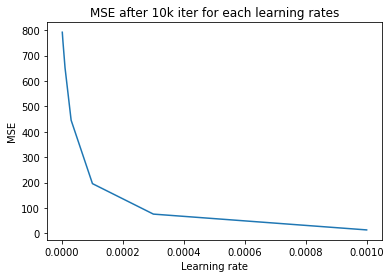

In [ ]:
plt.plot(alpha, MSE_score)
plt.xlabel('Learning rate')
plt.ylabel('MSE')
plt.title('MSE after 10k iter for each learning rates')
plt.show()

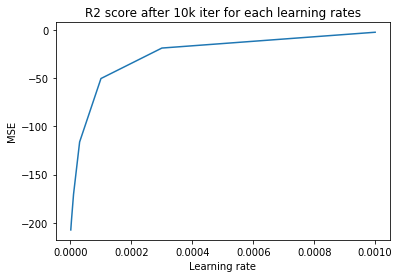

In [ ]:
plt.plot(alpha, R2_score)
plt.xlabel('Learning rate')
plt.ylabel('MSE')
plt.title('R2 score after 10k iter for each learning rates')
plt.show()